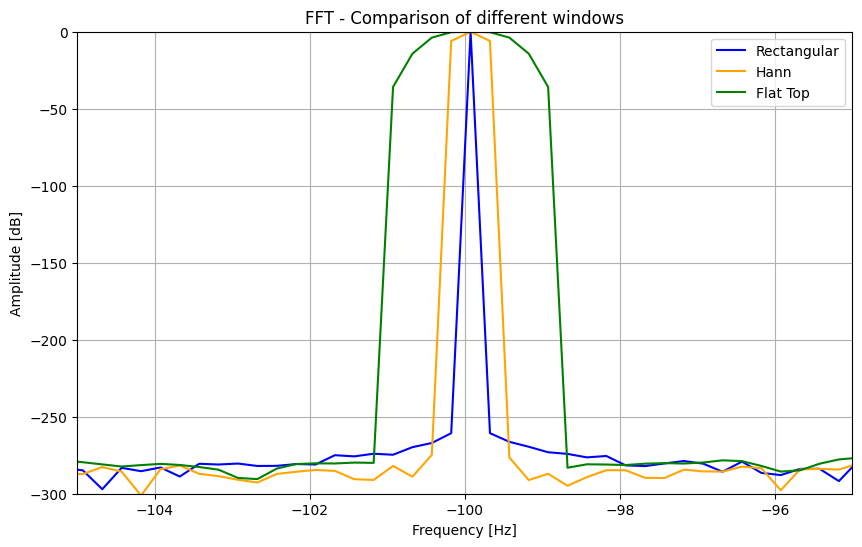

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop

# Task data
f1, f2, f3 = 600, 600.25, 599.75  # Hz (may cause aliasing)
fs = 500  # Hz
N = 2000
amplitude = 2

# Generating signals
k = np.arange(N)
x1 = amplitude * np.sin(2 * np.pi * f1 / fs * k)

# Windows
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)

# Windowing the signal
Xwrect = fftshift(fft(x1 * wrect))
Xwhann = fftshift(fft(x1 * whann))
Xwflattop = fftshift(fft(x1 * wflattop))

# Function for FFT normalization
def fft2db(X):
    Xtmp = np.abs(X)
    Xtmp[Xtmp == 0] = np.min(Xtmp[Xtmp > 0])  # Avoid log(0)
    Xtmp = Xtmp / np.max(Xtmp)  # Normalization
    return 20 * np.log10(Xtmp)

# Frequency axis
df = fs / N
f = np.linspace(-fs/2, fs/2, N)

# FFT plot for all windows on one graph
plt.figure(figsize=(10, 6))
plt.plot(f, fft2db(Xwrect), label='Rectangular', color='blue')
plt.plot(f, fft2db(Xwhann), label='Hann', color='orange')
plt.plot(f, fft2db(Xwflattop), label='Flat Top', color='green')

plt.xlim(-105, -95)
plt.ylim(-300, 0)
plt.grid()
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [dB]")
plt.title("FFT - Comparison of different windows")

plt.show()
